# Detección de anomalías DL. Autoencoders

In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Crear dataset con dos clústers

In [5]:
# Creamos un dataset con dos clústers bien diferenciados
X, Y = make_blobs(n_samples = 300, centers = 2, cluster_std = 1.0, random_state=42)

# Crear dataset datos anómalos

In [8]:
# Añadimos datos anómalos al dataset
np.random.seed(42)
outliers = np.random.uniform(low=10, high=15, size=(20, 2))

# Unión dataset normales y anómalos

In [9]:
# Unimos los outliers al dataset
X = np.vstack([X, outliers])

# Normalización datos

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definición del modelo

## Definición del tamaño de features de entrada

In [16]:
# Definimos el número de features de entrada. Tenemos 320 muestras de 2 dimenssiones (X e Y) por lo que el nº features es 2
input_dim = X_scaled.shape[1]
input_layer = layers.Input(shape=(input_dim,))

## Definición del número de neuronas de la capa de codificación

In [18]:
encoding_dim = 2
# El poner (input_layer) al final indica que la capa encoded recibe como entrada la capa input_layer
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

## Definición capa decodificación

In [20]:
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

## Creación del modelo

In [22]:
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo

In [23]:
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Train on 256 samples, validate on 64 samples
Epoch 1/50
256/256 [==============================] - 0s 1ms/sample - loss: 1.3589 - val_loss: 1.5861
Epoch 2/50
256/256 [==============================] - 0s 59us/sample - loss: 1.3494 - val_loss: 1.5777
Epoch 3/50
256/256 [==============================] - 0s 57us/sample - loss: 1.3404 - val_loss: 1.5694
Epoch 4/50
256/256 [==============================] - 0s 55us/sample - loss: 1.3311 - val_loss: 1.5614
Epoch 5/50
256/256 [==============================] - 0s 58us/sample - loss: 1.3222 - val_loss: 1.5534
Epoch 6/50
256/256 [==============================] - 0s 55us/sample - loss: 1.3132 - val_loss: 1.5458
Epoch 7/50
256/256 [==============================] - 0s 58us/sample - loss: 1.3041 - val_loss: 1.5386
Epoch 8/50
256/256 [==============================] - 0s 55us/sample - loss: 1.2956 - val_loss: 1.5315
Epoch 9/50
256/256 [==============================] - 0s 58us/sample - loss: 1.2872 - val_loss: 1.5246
Epoch 10/50
256/256 [========

# Realizar predicciones --> Detección de anomalías. Si no reconstruye bien la muestra es una anomalía

In [24]:
X_reconstructed = autoencoder.predict(X_scaled)

In [38]:
X_reconstructed.shape

(320, 2)

## Cálculamos el MSE de las predicciones

In [50]:
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

## Detectamos las anomalías

In [52]:
# Establecemos el umbral de anomalía en un 95% de los errores más bajos.
threshold = np.percentile(reconstruction_error, 95)
print(f'El Threshold es: {threshold}')

El Threshold es: 1.9528822795095415


In [53]:
# Clasificamos las anomalías en base al error
X_normal_autoencoder = X[reconstruction_error < threshold]
X_anomalies_autoencoder =  X[reconstruction_error >= threshold]

# Visualización de resultados

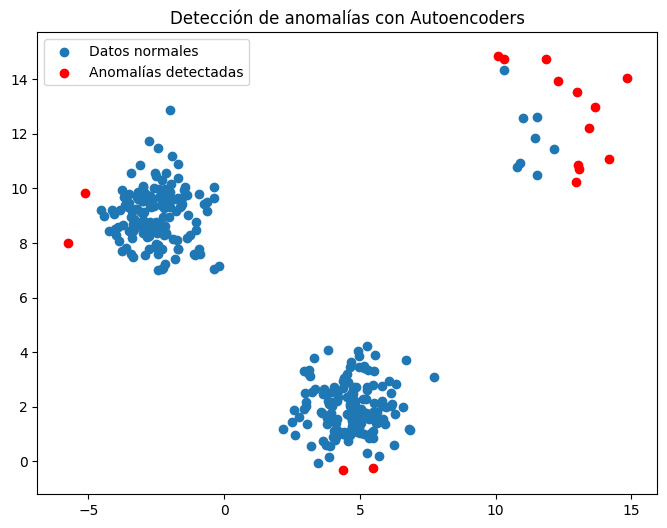

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X_normal_autoencoder[:, 0], X_normal_autoencoder[:, 1], label="Datos normales")
plt.scatter(X_anomalies_autoencoder[:, 0], X_anomalies_autoencoder[:, 1], color='red', label="Anomalías detectadas")
plt.legend()
plt.title("Detección de anomalías con Autoencoders")
plt.show()